## Decision Tree

* Decision Tree is a CART model, means Classification and Regression tree. CART model works by recursive partitioning of data in resulting in a local region of defined model. Local region is depicted as a leaf of the decision tree where we have reached to the conclusion of partitioning of the data.
* To explain the CART approach, a function is used to define the region and the weights which specifies the response value in each region. That function is adaptive basis function. Like in a classification model, a threshold is set for each node to decide the next level in the set of (yes,no). 
* In Regression model, a regression cost is defined, linear regression model is fitted to each node using the inputs as features chosen from the root node and the residual error is then measured. The goal of the tree is here to minimize the residual error. 
* In Classification model, a classification model is defined and in order to maximize the accuracy of the model, there are several common errors caused during the evaluation of the proposed partition. 
1. Entropy or deviance -  It is the measure of the impurity or disorder in the node. It tells that how much a predicted value is deviated from the observed value of a feature. The optimality is reached by minimizing the entropy. The minimizaton of the entropy is equal to the maximization of the information gain. Information gain is the criteria which decides whether a feature is used for splitting the node. The feature which have the highest value of the information gain is used as a feature for splitting the node.
2. Gini Index - It measures the probability for a random instance being misclassified when chosen randomly. Alternatively, it measures the probability of misclassification rate for every feature. It chooses that feature to split the node whose probability of misclassification rate is minimum.
* Difference between gini index and entropy - Gini index and entropy, both are used for splitting the node. But, here are some major differences:
1. Gini index is calculated in the range [0,0.5], while entropy is calculated in the range [0,1].
2. Entropy is calculated on the basis of logarithms of base 2, while gini index is calculated by subtracting the sum of the squares of the probability of misclassification rate from 1.
3. Gini index has more clarity in understanding the tree and always predict more accurate than entropy.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
data = pd.read_csv("/kaggle/input/credit-score-dataset/credit_score.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Null Data

In [3]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [4]:
data.shape

(100000, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Selecting null columns, object columns and numerical columns

In [6]:
nulldata = data.isnull().sum()
nulldata = nulldata[nulldata>0]
nullcol = list(nulldata.index)
nullcol

['Name',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [7]:
objcol = []
for i in data.columns:
    if data[i].dtype == 'object':
        objcol.append(i)
        
objcol        

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [8]:
numcol = []
for i in data.columns:
    if data[i].dtype != 'object':
        numcol.append(i)
        
numcol        

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [9]:
objmatch = []
for i in nullcol:
    for j in objcol:
        if i==j:
            objmatch.append(j)
        
objmatch        

['Name',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [10]:
nummatch = []
for i in nullcol:
    for j in numcol:
        if i==j:
            nummatch.append(j)
        
nummatch        

['Monthly_Inhand_Salary', 'Num_Credit_Inquiries']

## Data Cleaning

In [11]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('_','')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(float)

In [12]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace('_','')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)

In [13]:
data['Monthly_Balance'] = data['Monthly_Balance'].str.replace('_','')
data['Monthly_Balance'] = data['Monthly_Balance'].astype(float)

In [14]:
objcol = set(objcol)-set(['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance'])
objcol = list(objcol)
objcol

['Credit_History_Age',
 'Occupation',
 'Outstanding_Debt',
 'SSN',
 'Num_of_Loan',
 'Credit_Score',
 'Credit_Mix',
 'Type_of_Loan',
 'Annual_Income',
 'Customer_ID',
 'Month',
 'Name',
 'Changed_Credit_Limit',
 'ID',
 'Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [15]:
nulldata

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [16]:
data = data.fillna(method='ffill')
data = data.fillna(method = 'bfill')
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [17]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('_','')
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)

In [18]:
data['Annual_Income'] = data['Annual_Income'].str.replace('_','')
data['Annual_Income'] = data['Annual_Income'].astype(float)

In [19]:
data['Age'] = data['Age'].str.replace('_','')
data['Age'] = data['Age'].astype(int)

In [20]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('_','')
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)

In [21]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_',np.nan)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [22]:
col_to_clean = ['Credit_Mix','Occupation','Payment_Behaviour','Payment_of_Min_Amount']
for i in col_to_clean:
    print(f"{i}\n{data[i].value_counts()}\n\n")

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64




In [23]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_',np.nan)
data['Occupation'] = data['Occupation'].replace('_______',np.nan)
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8',np.nan)
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM','No')

In [24]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2091
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7600
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [25]:
data = data.fillna(method='ffill')
data = data.fillna(method = 'bfill')
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [26]:
objcol = set(objcol) - set(['ID','Customer_ID','Name','SSN','Credit_History_Age','Outstanding_Debt',
                            'Annual_Income','Age','Num_of_Loan','Changed_Credit_Limit',
                            'Credit_Score','Type_of_Loan'])
objcol = list(objcol)
objcol

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [27]:
for i in objcol:
    print(f"{i}\n{data[i].value_counts()}\n\n")

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


Occupation
Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64


Credit_Mix
Standard    45820
Good        30352
Bad         23828
Name: Credit_Mix, dtype: int64


Payment_of_Min_Amount
Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64


Payment_Behaviour
Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments

## Data Visualization

#### Occupation

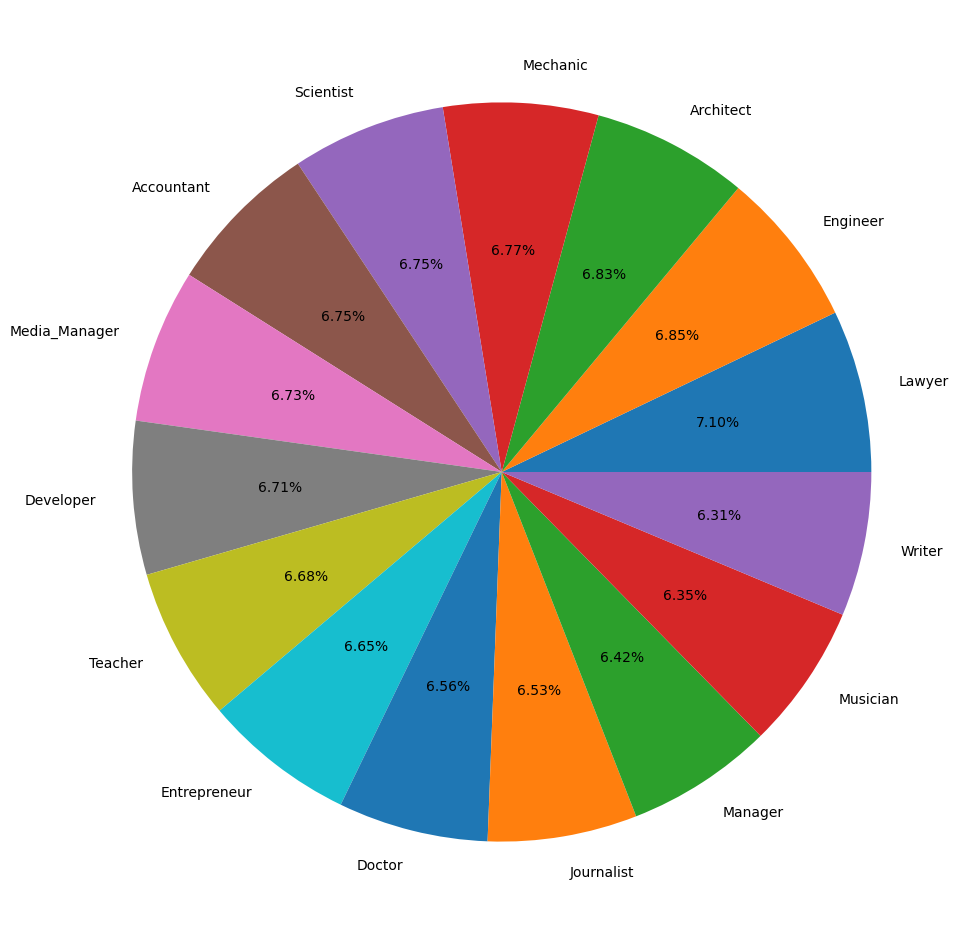

In [28]:
plt.subplots(figsize = (20,12))
plt.pie(x = data['Occupation'].value_counts().values,labels = data['Occupation'].value_counts().index, autopct = '%0.02f%%')
plt.show()

#### Visualizing the number of accounts with credit scores and credit mixes

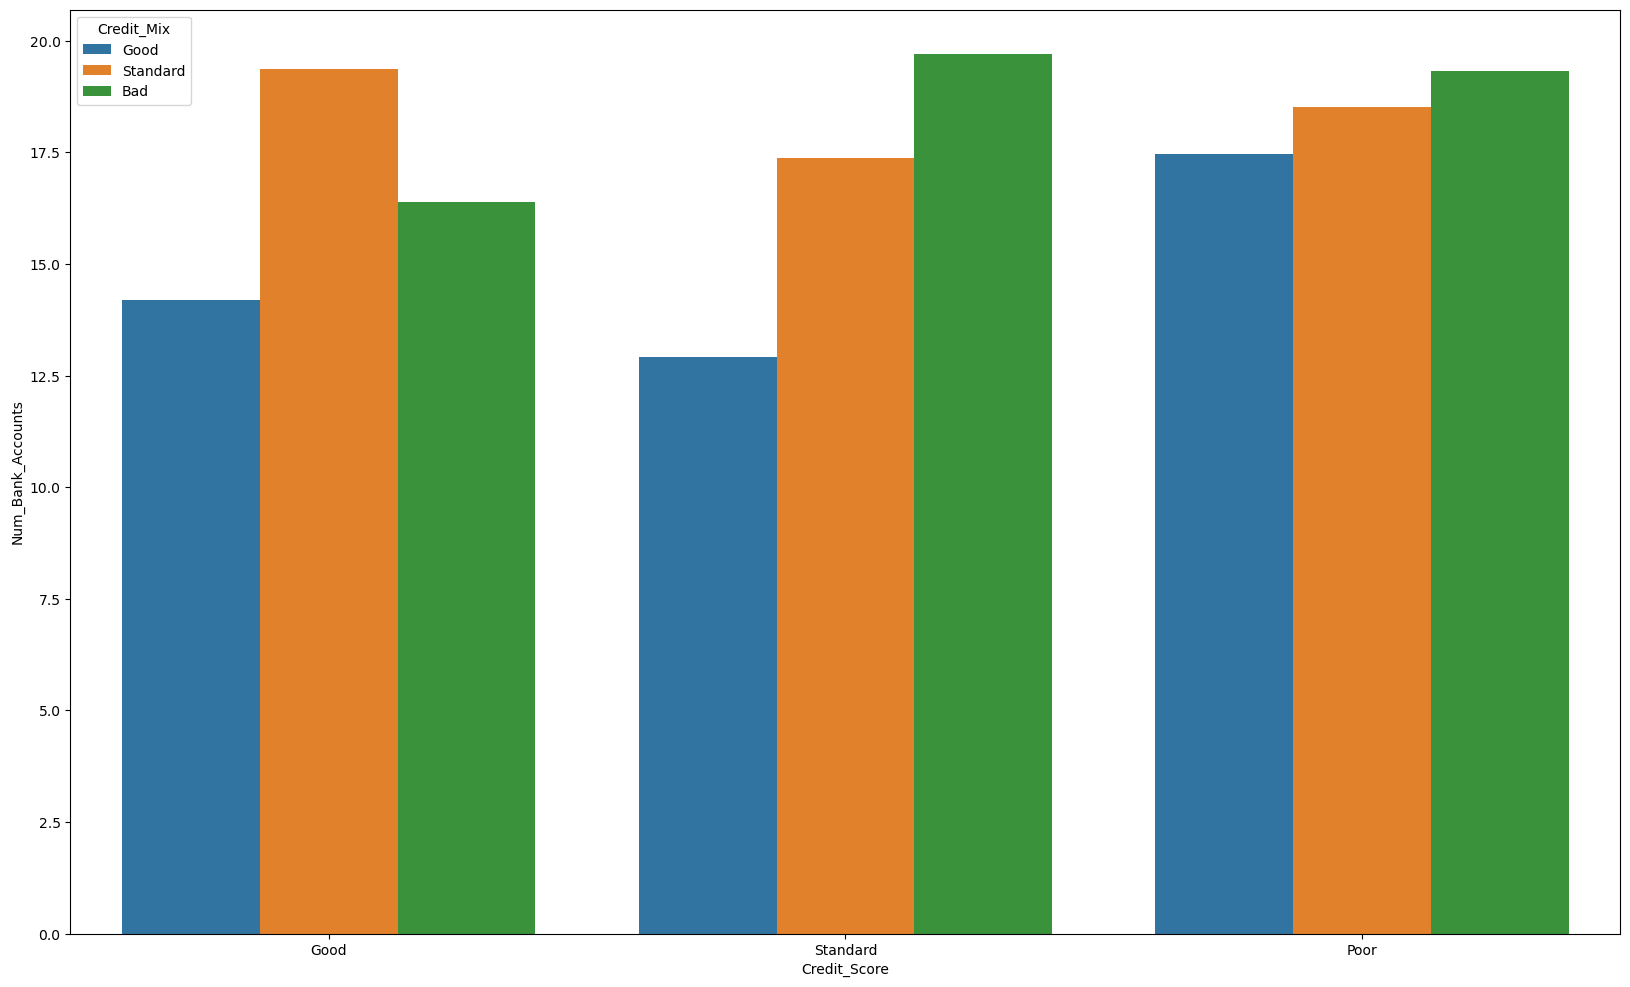

In [29]:
plt.subplots(figsize = (20,12))
sns.barplot(data, x = data.Credit_Score,y = data.Num_Bank_Accounts, ci = None, hue = data.Credit_Mix)
plt.show()

#### Visualizing number of bank accounts have credit scores on the basis of Payment behaviours

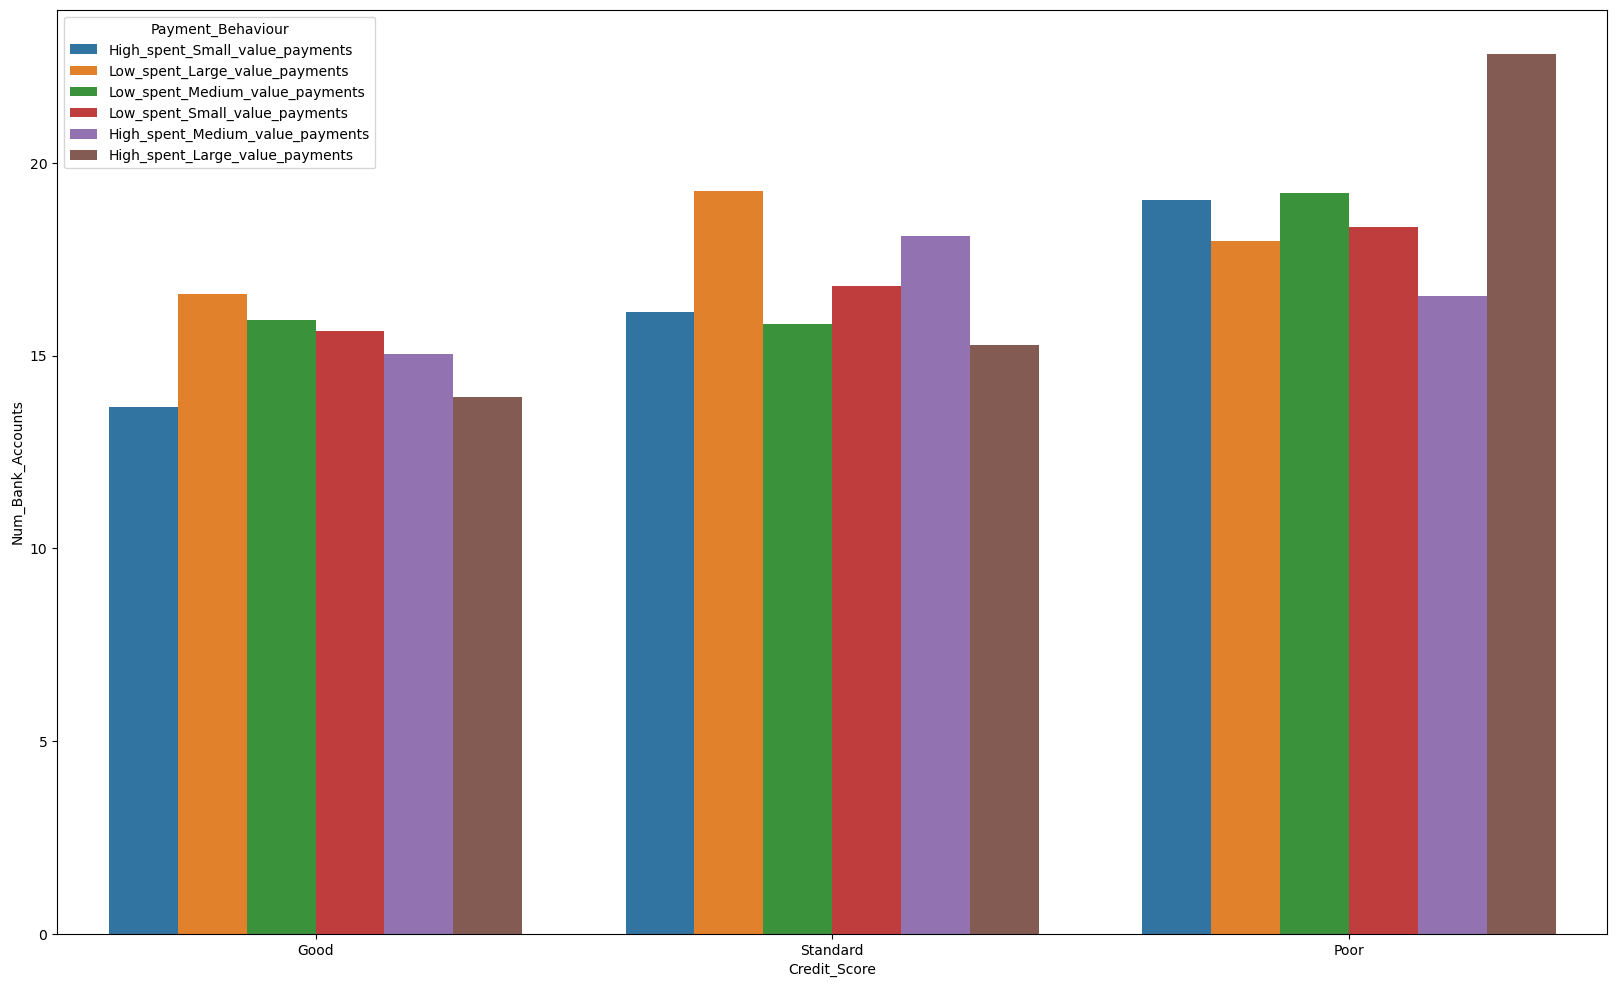

In [30]:
plt.subplots(figsize = (20,12))
sns.barplot(data, x = data.Credit_Score,y = data.Num_Bank_Accounts, ci = None, hue = data.Payment_Behaviour)
plt.show()

#### Visualizing the number of credit cards with payment behaviour on the basis of payment of minimum amount

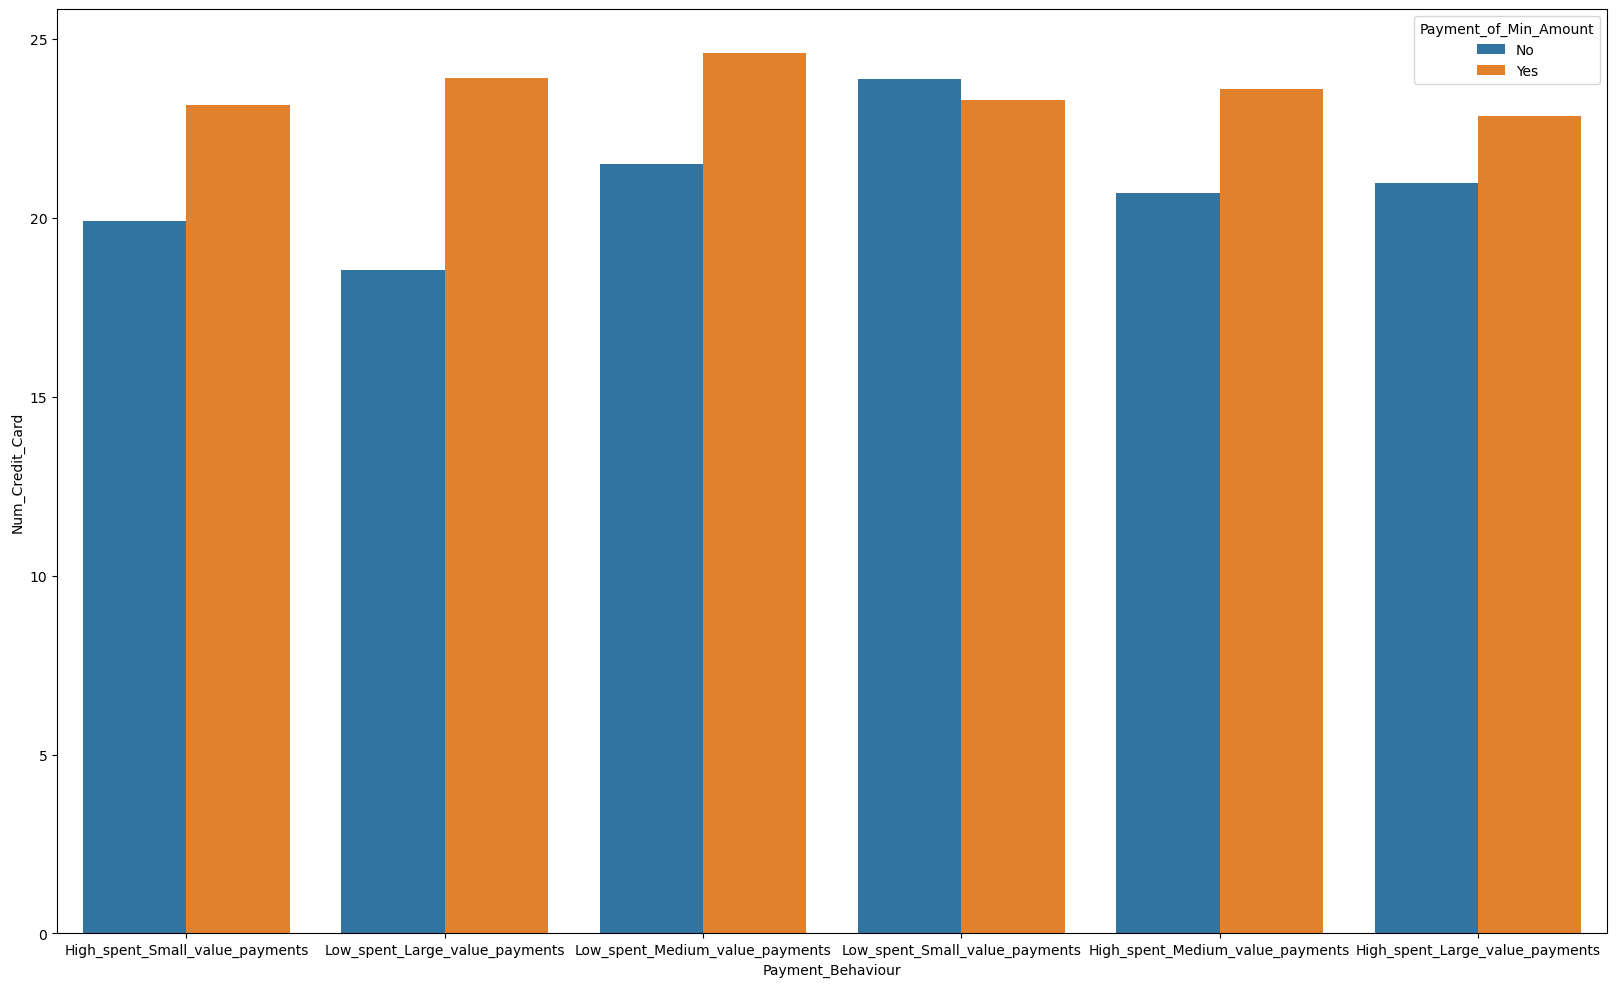

In [31]:
plt.subplots(figsize = (20,12))
sns.barplot(data, x = data.Payment_Behaviour,y = data.Num_Credit_Card, ci = None,hue = data.Payment_of_Min_Amount)
plt.show()

## Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in objcol:
    data[i] = le.fit_transform(data[i])
    print(f"{i}\n{le.classes_}\n\n")

Month
['April' 'August' 'February' 'January' 'July' 'June' 'March' 'May']


Occupation
['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Scientist' 'Teacher' 'Writer']


Credit_Mix
['Bad' 'Good' 'Standard']


Payment_of_Min_Amount
['No' 'Yes']


Payment_Behaviour
['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments']




## Outlier Detection

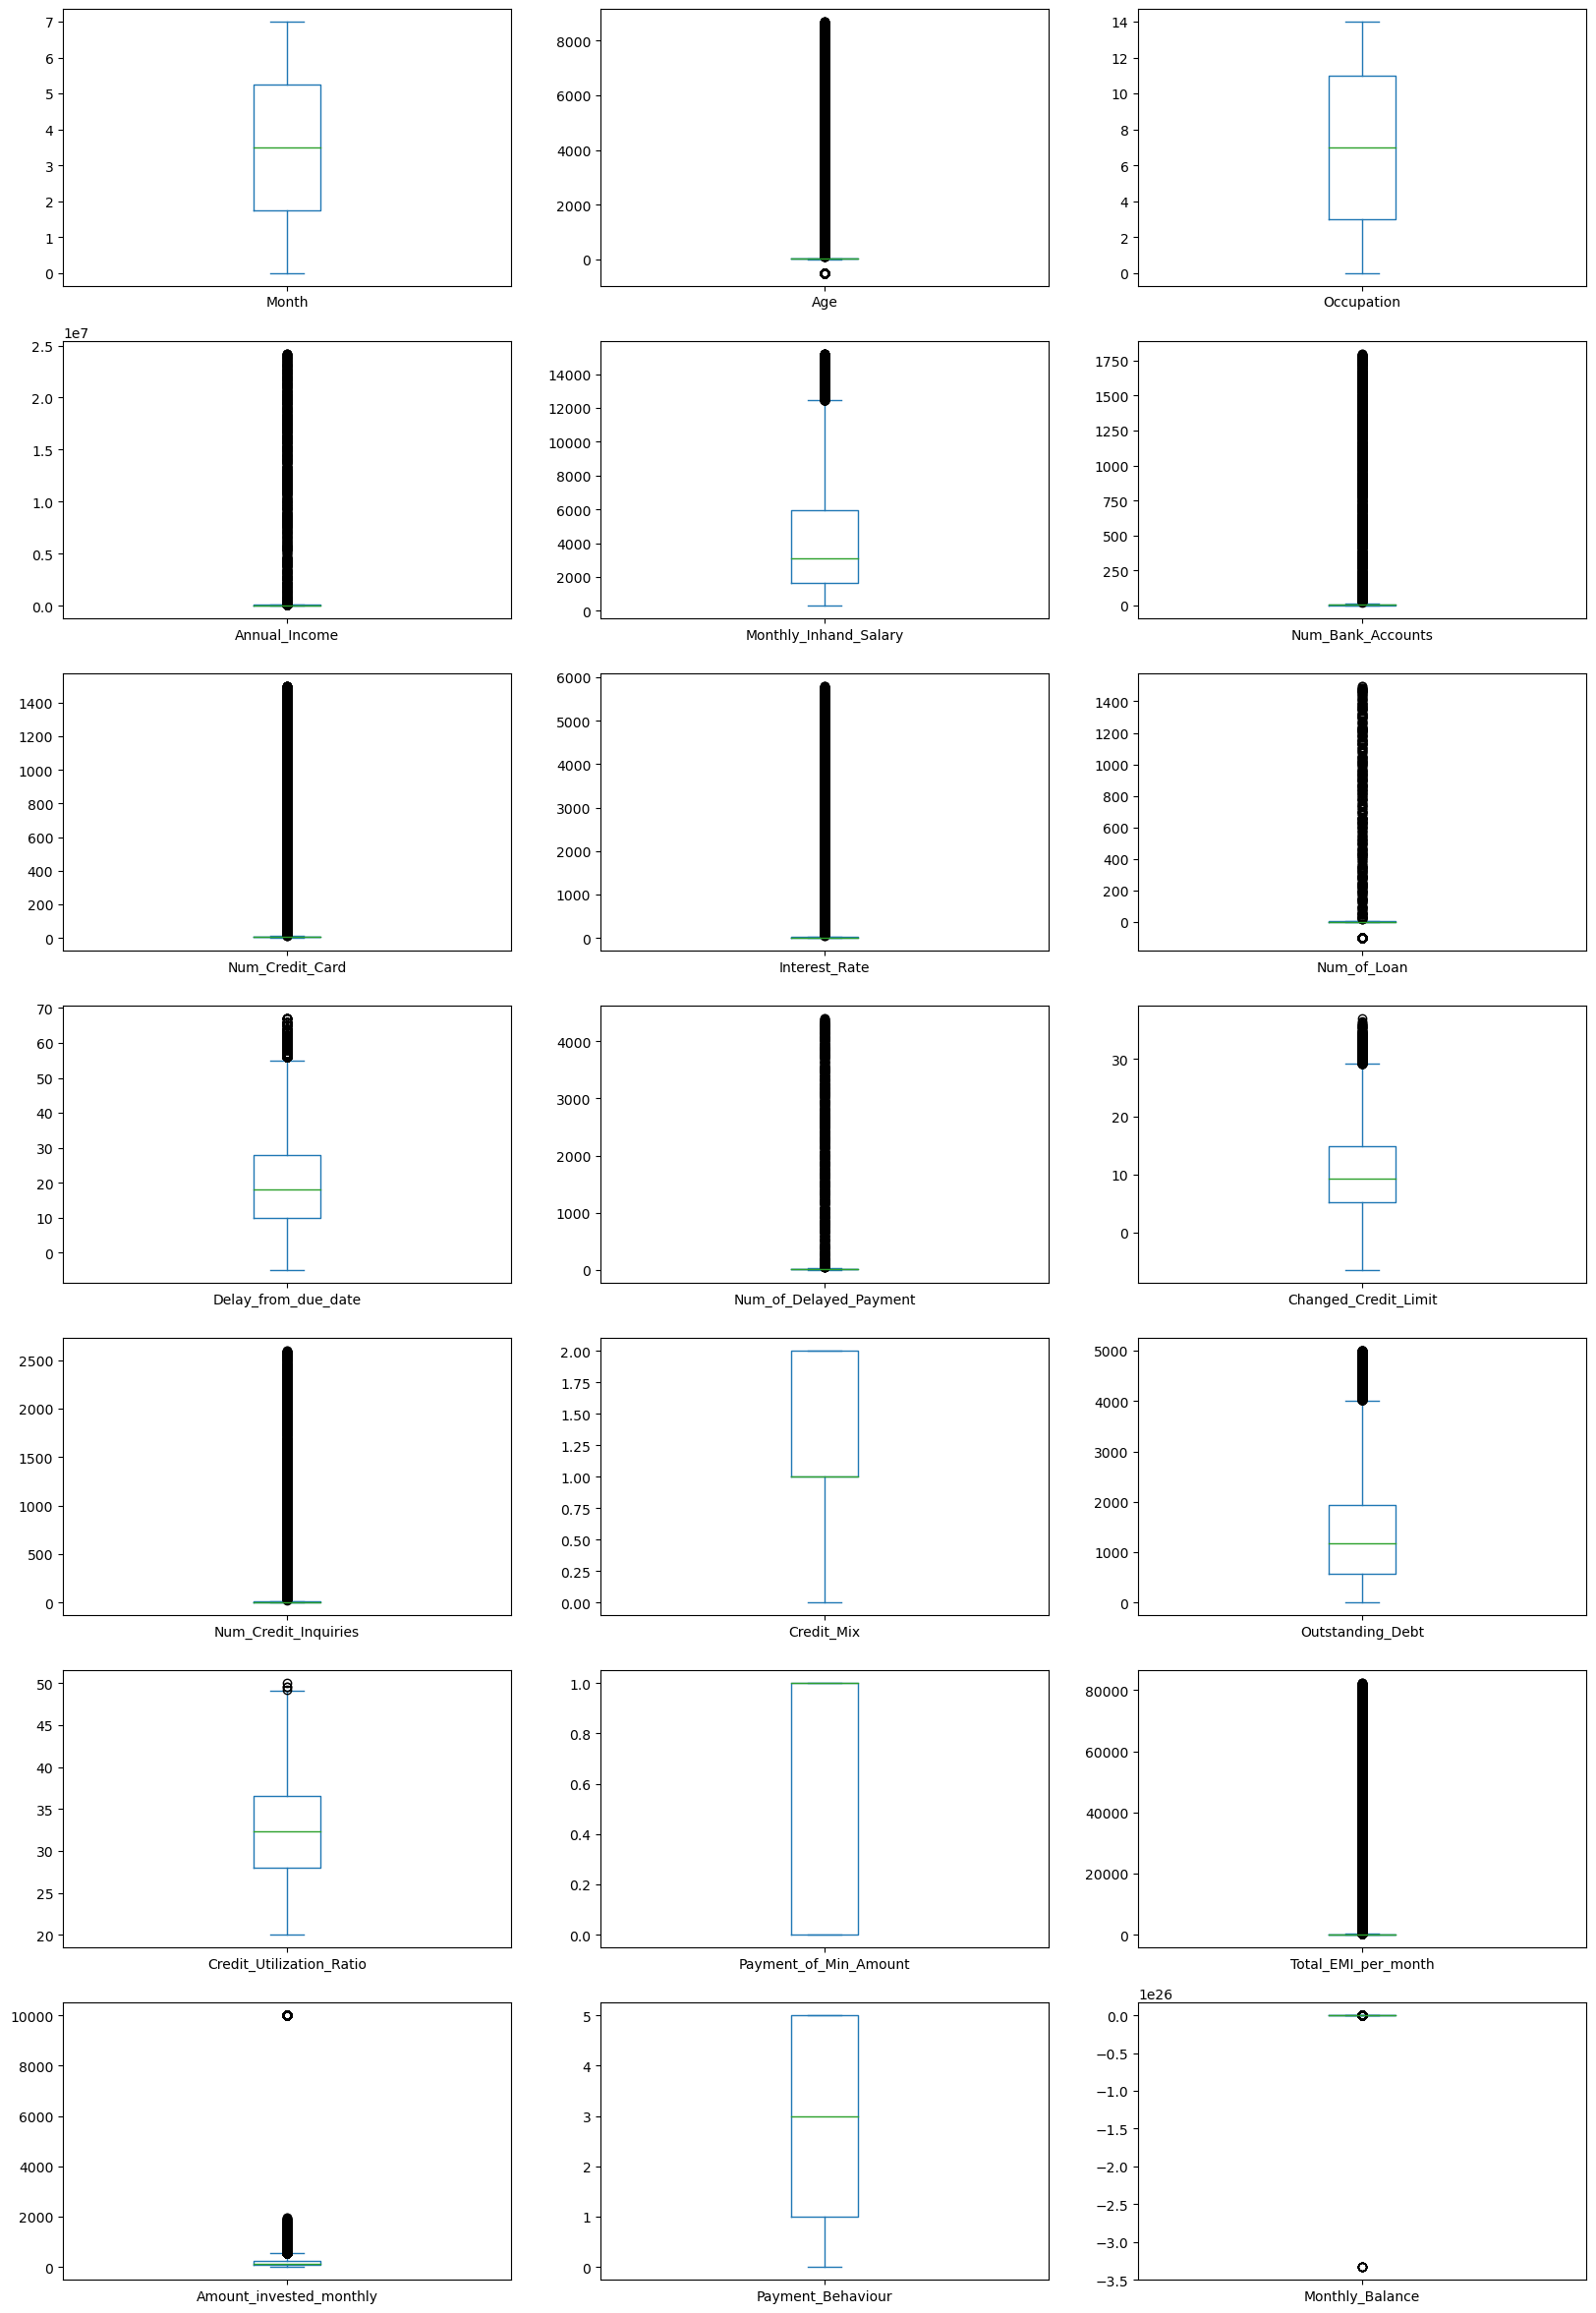

In [33]:
data.plot(kind = 'box',subplots = True, layout = (7,3),figsize = (20,30))
plt.show()

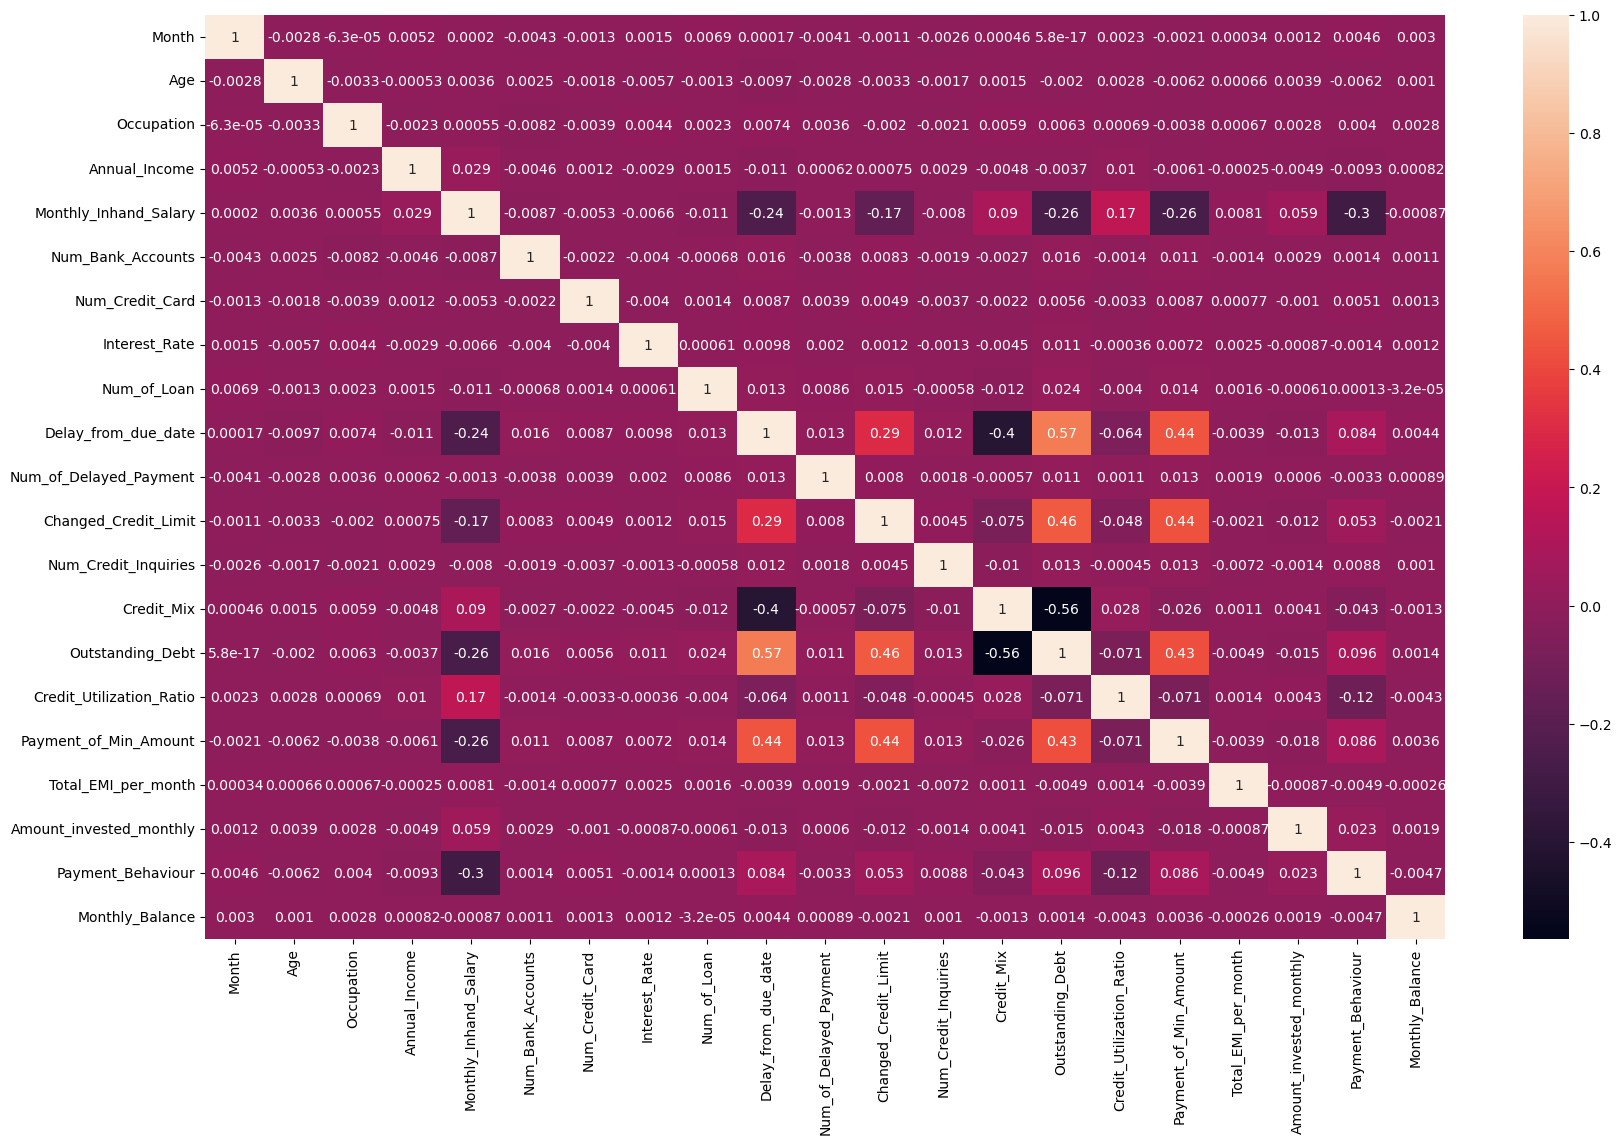

In [34]:
plt.subplots(figsize = (20,12))
sns.heatmap(data.corr(),annot = True)
plt.show()

*  There are very less significant features with good correlations

## Eliminating negative values from Age 

In [35]:
negval = data[data['Age']<0].Age.index

In [36]:
data = data.drop(negval,axis=0)

* There are many features, to find if all features are important, we will check by feature importance using variance inflation factor.

## Trying Feature Importance

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0                      Month  0.299966
1                        Age  0.972219
2                 Occupation  0.277772
3              Annual_Income  0.984985
4      Monthly_Inhand_Salary  0.365771
5          Num_Bank_Accounts  0.979195
6            Num_Credit_Card  0.970558
7              Interest_Rate  0.976477
8                Num_of_Loan  0.997714
9        Delay_from_due_date  0.332121
10    Num_of_Delayed_Payment  0.981709
11      Changed_Credit_Limit  0.299335
12      Num_Credit_Inquiries  0.979772
13                Credit_Mix  0.303255
14          Outstanding_Debt  0.396136
15  Credit_Utilization_Ratio  0.024505
16     Payment_of_Min_Amount  0.476592
17       Total_EMI_per_month  0.972289
18   Amount_invested_monthly  0.911309
19         Payment_Behaviour  0.310562
20           Monthly_Balance  1.000209


* All features are important, so no deduction of features can be done in order to achieve more accuracy of the model.

In [38]:
data.shape

(99114, 28)

In [39]:
X = data.drop(columns = ['ID','Customer_ID','Name','SSN','Credit_History_Age','Type_of_Loan','Credit_Score'])
y = data[['Credit_Score']]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 99)

## Simple Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [42]:
from sklearn import metrics

## Helper function for evaluation metrics

In [43]:
def evaluation_metrics(model,y_test,y_pred):
    print(f"Test Score = {metrics.accuracy_score(y_test,y_pred)}\n")
    print(f"Train Score = {model.score(x_train,y_train)}\n")
    print(f"Classification Report = \n{metrics.classification_report(y_test,y_pred)}\n")
    cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    print("Confusion Matrix:\n")
    disp.plot()
    plt.show()

Test Score = 0.6983806689199414

Train Score = 1.0

Classification Report = 
              precision    recall  f1-score   support

        Good       0.62      0.62      0.62      3508
        Poor       0.68      0.69      0.68      5717
    Standard       0.73      0.73      0.73     10598

    accuracy                           0.70     19823
   macro avg       0.68      0.68      0.68     19823
weighted avg       0.70      0.70      0.70     19823


Confusion Matrix:



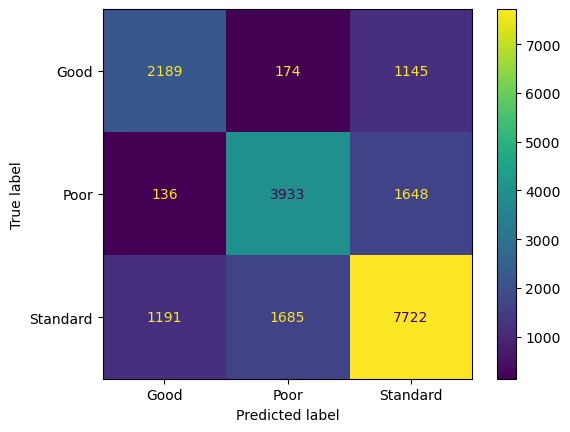

In [44]:
evaluation_metrics(model,y_test,y_pred)

## Overfitting
* The major limitation of using Decision Tree is overfitting which led due to data fragmentation, which means that after allowing multi-way splits, too little data fall in each subtree.
* To prevent overfitting, we can stop growing the tree by pruning. Pruning is done by growing the full tree and then pruning the branches which gives the least increase in error. To determine the pruning level, evaluation is done by cross validating error on each subtree and pick the tree whose CV error is within 1 standard error of the minimum. This way a simple tree is made by the point with minimum CV error.

## Hyperparameter Tuning
* Pruning by max depth

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 10

parameters = {'max_depth':range(1,21),
             'criterion':["entropy","gini"]}
tree = DecisionTreeClassifier()
gridSearch = GridSearchCV(estimator = tree, param_grid = parameters,
                         cv = n_folds, verbose = 1)
gridSearch.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 21)},
             verbose=1)

In [46]:
scores = gridSearch.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223048,0.005392,0.008444,0.000663,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.608323,0.602220,0.607517,0.598688,0.609409,0.599571,0.607517,0.604616,0.605120,0.605877,0.604886,0.003478,39
1,0.347176,0.006328,0.008350,0.000188,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.643506,0.639803,0.635894,0.642704,0.637281,0.640812,0.633245,0.637281,0.640055,0.640686,0.639127,0.003007,37
2,0.475680,0.005076,0.008477,0.000084,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.677680,0.680161,0.678144,0.680540,0.675369,0.680161,0.675117,0.674738,0.673477,0.679405,0.677479,0.002480,35
3,0.598010,0.007149,0.008557,0.000384,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.684111,0.687098,0.688359,0.689747,0.683441,0.687224,0.682558,0.682305,0.679531,0.685711,0.685008,0.003000,34
4,0.718484,0.012491,0.008483,0.000179,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.692686,0.698196,0.699584,0.701223,0.696683,0.697061,0.696052,0.697818,0.695422,0.700214,0.697494,0.002379,32


In [47]:
gridSearch.best_score_

0.7141164149608354

In [48]:
gridSearch.best_estimator_

DecisionTreeClassifier(max_depth=15)

In [49]:
best_score = scores[scores['mean_test_score'] == scores['mean_test_score'].max()]

for i in (best_score.iloc[:,5].values):
    best_max_depth = i
    print(best_max_depth)

15


In [50]:
tree_best = DecisionTreeClassifier(max_depth = best_max_depth,criterion = "gini")
tree_best.fit(x_train,y_train)
y_pred_best = tree_best.predict(x_test)

Test Score = 0.7190132674166373

Train Score = 0.8134845064383095

Classification Report = 
              precision    recall  f1-score   support

        Good       0.58      0.70      0.63      3508
        Poor       0.72      0.72      0.72      5717
    Standard       0.78      0.72      0.75     10598

    accuracy                           0.72     19823
   macro avg       0.69      0.72      0.70     19823
weighted avg       0.73      0.72      0.72     19823


Confusion Matrix:



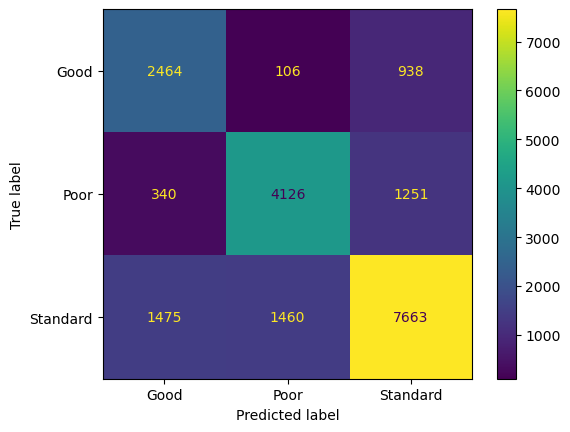

In [51]:
evaluation_metrics(tree_best,y_test,y_pred_best)

* Overfitting is eliminated, as there are very small differences between train score and test score as compared to the simple model where train score was much higher than test score

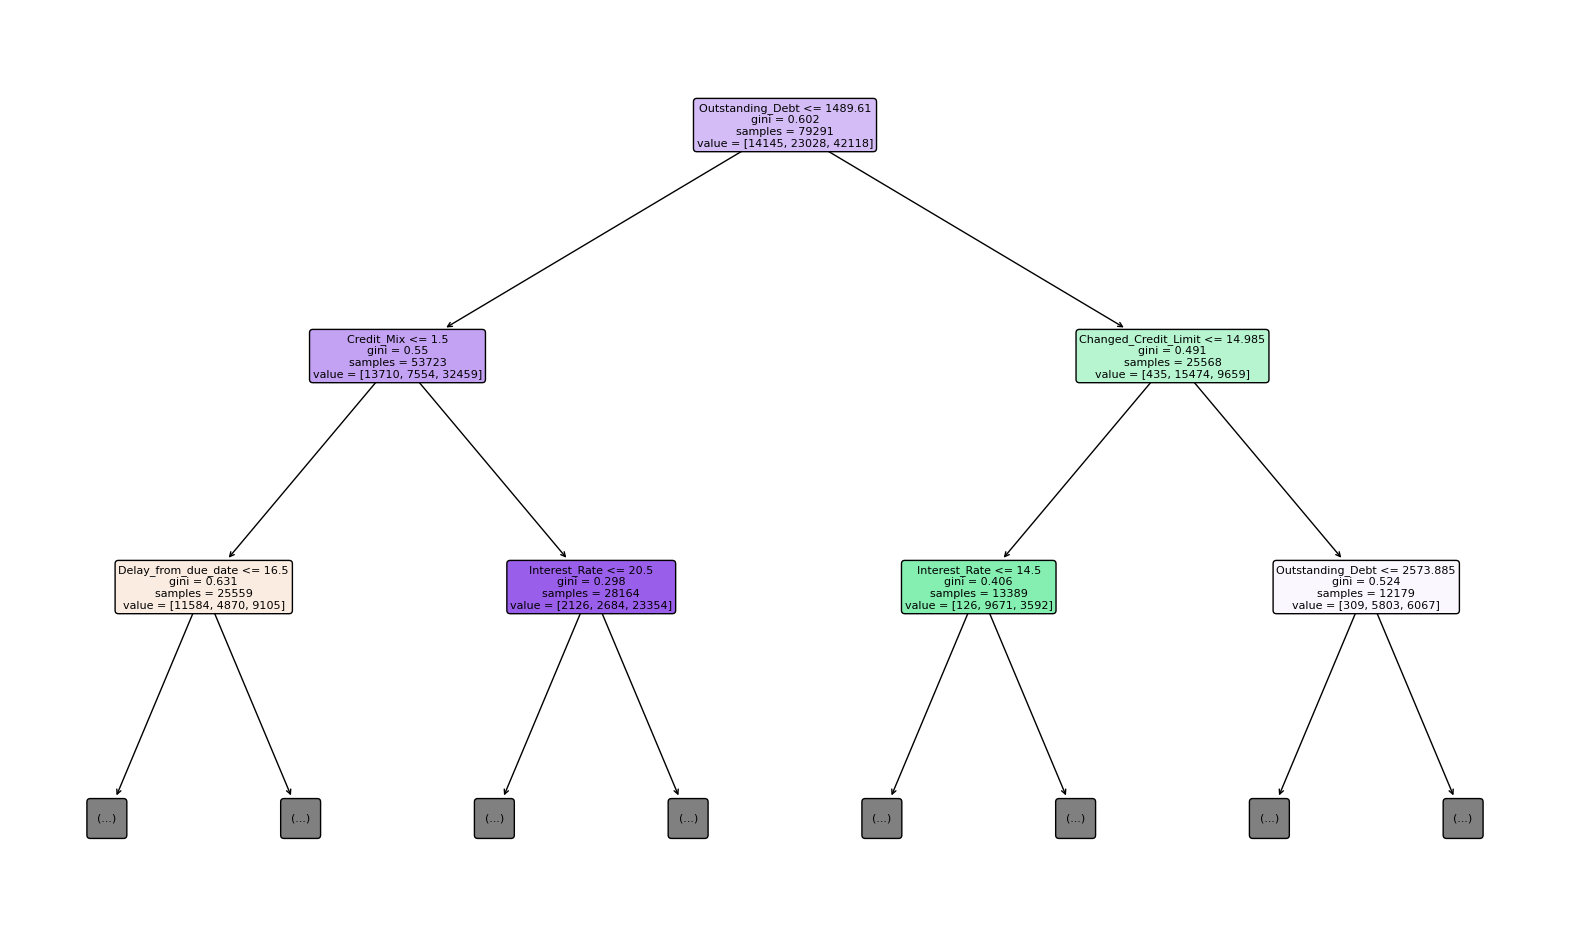

In [52]:
plt.subplots(figsize = (20,12))
from sklearn.tree import plot_tree
plot_tree(tree_best,max_depth = 2, feature_names = list(x_train.columns), filled = True, rounded = True)
plt.show()

## Trying Cost Complexity Pruning

In [53]:
path = tree_best.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

In [54]:
len(ccp_alphas)

2251

In [55]:
print(f"""The length of ccp_alphas are very high. 
For post pruning, we have to find that ccp_alpha which gave us train 
and test score approximately equal or near.
It is very time taking to train {len(ccp_alphas)} models 
and then compare the scores of the model. So, Post pruning is not performed here.""")

The length of ccp_alphas are very high. 
For post pruning, we have to find that ccp_alpha which gave us train 
and test score approximately equal or near.
It is very time taking to train 2251 models 
and then compare the scores of the model. So, Post pruning is not performed here.
